# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)
# print(cities)

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [4]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [5]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')
        

Beginning Data Retrieval
---------------------
Processing City # 1 | comodoro rivadavia
Processing City # 2 | flinders
Processing City # 3 | trelew
Processing City # 4 | santa lucia
Processing City # 5 | tsihombe
City not found. skipping...
Processing City # 6 | puerto del rosario
Processing City # 7 | fergus falls
Processing City # 8 | lircay
Processing City # 9 | tuatapere
Processing City # 10 | cockburn town
Processing City # 11 | hobart
Processing City # 12 | vaini
Processing City # 13 | esperance
Processing City # 14 | ryotsu
Processing City # 15 | alta floresta
Processing City # 16 | hermanus
Processing City # 17 | illoqqortoormiut
City not found. skipping...
Processing City # 18 | hithadhoo
Processing City # 19 | san andres
Processing City # 20 | boguchany
Processing City # 21 | wajir
Processing City # 22 | grand centre
City not found. skipping...
Processing City # 23 | punta arenas
Processing City # 24 | puerto colombia
Processing City # 25 | ushuaia
Processing City # 26 | ndjo

Processing City # 228 | souillac
Processing City # 229 | luau
Processing City # 230 | bahile
Processing City # 231 | salekhard
Processing City # 232 | sidi ali
Processing City # 233 | ardakan
Processing City # 234 | saurimo
Processing City # 235 | laguna
Processing City # 236 | chulman
Processing City # 237 | constitucion
Processing City # 238 | kaitangata
Processing City # 239 | ikom
Processing City # 240 | zhanaozen
Processing City # 241 | kieta
Processing City # 242 | kitimat
Processing City # 243 | dukat
Processing City # 244 | cape town
Processing City # 245 | los llanos de aridane
Processing City # 246 | upernavik
Processing City # 247 | appleton
Processing City # 248 | katsuura
Processing City # 249 | ketchikan
Processing City # 250 | gat
Processing City # 251 | banamba
Processing City # 252 | te anau
Processing City # 253 | tarakan
Processing City # 254 | pacific grove
Processing City # 255 | severo-kurilsk
Processing City # 256 | shar
Processing City # 257 | namibe
Processing 

Processing City # 461 | coahuayana
Processing City # 462 | kutum
Processing City # 463 | pucara
Processing City # 464 | jiaocheng
Processing City # 465 | malazgirt
Processing City # 466 | klyuchi
Processing City # 467 | grand gaube
Processing City # 468 | fukue
Processing City # 469 | lavrentiya
Processing City # 470 | alamosa
Processing City # 471 | jalgaon
Processing City # 472 | ocampo
Processing City # 473 | gizo
Processing City # 474 | salym
Processing City # 475 | ambodifototra
City not found. skipping...
Processing City # 476 | hagerstown
Processing City # 477 | chara
Processing City # 478 | wadi musa
Processing City # 479 | krasnyy chikoy
Processing City # 480 | cozumel
City not found. skipping...
Processing City # 481 | raga
City not found. skipping...
Processing City # 482 | acapulco
Processing City # 483 | nan
Processing City # 484 | lolua
City not found. skipping...
Processing City # 485 | awjilah
Processing City # 486 | ilulissat
Processing City # 487 | merrill
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df =[]
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [7]:
weather_df.count()

City               554
Cloudiness         554
Country            554
Date               554
Humidity           554
Lat                554
Lng                554
Max Temperature    554
Wind Speed         554
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='purple')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

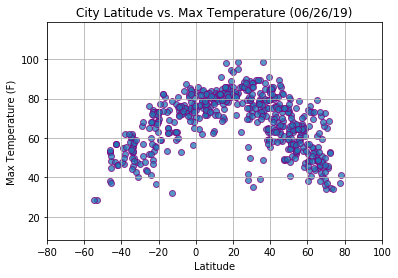

In [9]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

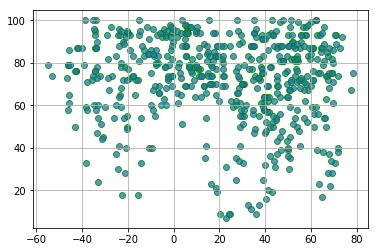

In [10]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='green')
    plt.grid()


lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

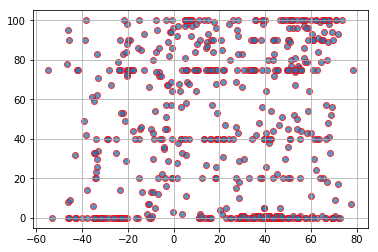

In [11]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='red')
    plt.grid()

lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

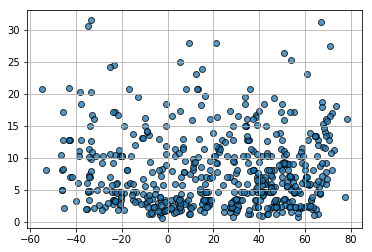

In [12]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.grid()

lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

In [ ]:
Weather Data Analysis

